In [1]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/salary.csv', index_col = 0)
df.head()

,year,salary
1,2.4,6600
2,5.5,10100
3,3.3,7300
4,0.2,5000
5,1.5,6100


Populating the interactive namespace from numpy and matplotlib


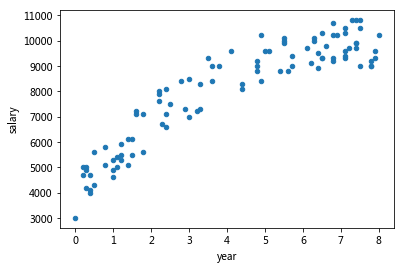

In [2]:
%pylab inline
df.plot(kind = 'scatter',x = 'year', y= 'salary')

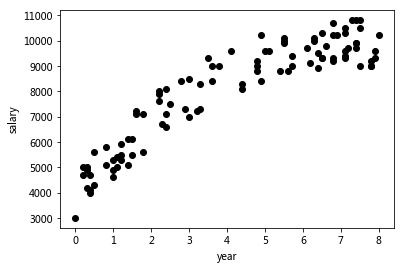

In [3]:
from matplotlib import pyplot as plt
X = df[['year']]
Y = df['salary'].values
plt.scatter(X, Y, color='black')
plt.xlabel('year')
plt.ylabel('salary')
plt.show()

## 簡單線性迴歸

In [4]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
print('Intercept',regr.intercept_)
print('coefficient', regr.coef_)

Intercept 5049.00989981
coefficient [ 712.59413615]


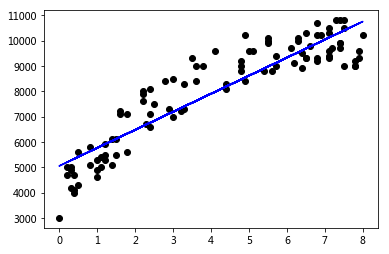

In [11]:
X = df[['year']]
Y = df['salary'].values
plt.scatter(X, Y, color='black')
plt.plot(X, regr.predict(X), color="blue")
plt.show()

In [13]:
salaries = pandas.DataFrame([{'year': 6}, {'year': 8}])
print(regr.predict(salaries))

#Intercept 5049.00989981
#coefficient [ 712.59413615]
712.59413615 * 6 + 5049.00989981

[  9324.57471669  10749.76298898]


9324.574716710002

In [15]:
from sklearn.externals import joblib
joblib.dump(regr, 'regression.pkl') 

['regression.pkl']

In [16]:
clf = joblib.load('regression.pkl') 

In [17]:
salaries = pandas.DataFrame([{'year': 6}, {'year': 8}])
print(clf.predict(salaries))

[  9324.57471669  10749.76298898]


## 多項式線性迴歸

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg = PolynomialFeatures(degree = 2)
X_ = poly_reg.fit_transform(X)

regr = LinearRegression()
regr.fit(X_,Y )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

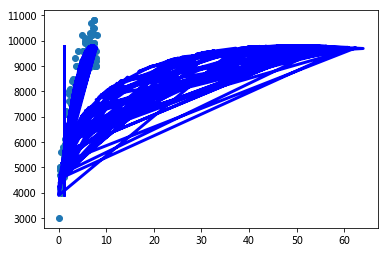

In [26]:
plt.scatter(X,Y)
plt.plot(X_, regr.predict(X_), color = 'blue', linewidth = 3)
plt.show()

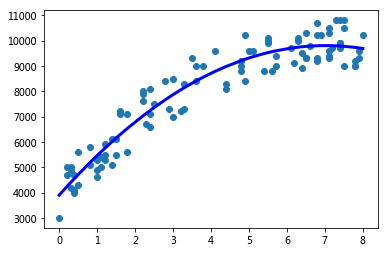

In [30]:
X2  = X.sort_values('year')
X2_ = poly_reg.fit_transform(X2)

plt.scatter(X,Y)
plt.plot(X2, regr.predict(X2_), color = 'blue', linewidth = 3)
plt.show()

## 多元迴歸模型

In [31]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/house-prices.csv')
df.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [37]:
dummy_brick    = pandas.get_dummies(df['Brick'])
dummy_neighbor = pandas.get_dummies(df['Neighborhood'])

house = pandas.concat([df, dummy_brick, dummy_neighbor], axis = 1)

In [39]:
del house['No']
del house['West']
del house['Brick']
del house['Neighborhood']
del house['Home']

In [40]:
house.head()

,Price,SqFt,Bedrooms,Bathrooms,Offers,Yes,East,North
0,114300,1790,2,2,2,0,1,0
1,114200,2030,4,2,3,0,1,0
2,114800,1740,3,2,1,0,1,0
3,94700,1980,3,2,3,0,1,0
4,119800,2130,3,3,3,0,1,0


In [43]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

X = house[['SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Yes', 'East','North']]
Y = house['Price'].values

regr.fit(X,Y)
#regr.predict(X)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## 評估迴歸模型

In [44]:
import statsmodels.api as sm

X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     113.3
Date:                Sat, 02 Sep 2017   Prob (F-statistic):           8.25e-50
Time:                        13:38:59   Log-Likelihood:                -1356.7
No. Observations:                 128   AIC:                             2729.
Df Residuals:                     120   BIC:                             2752.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       2.284e+04   1.02e+04      2.231      0.0

In [61]:
predictorcols = X.columns

In [62]:
import itertools
for rec in itertools.combinations(predictorcols, 2):
    print(rec)

('SqFt', 'Bedrooms')
('SqFt', 'Bathrooms')
('SqFt', 'Offers')
('SqFt', 'Yes')
('SqFt', 'East')
('SqFt', 'North')
('Bedrooms', 'Bathrooms')
('Bedrooms', 'Offers')
('Bedrooms', 'Yes')
('Bedrooms', 'East')
('Bedrooms', 'North')
('Bathrooms', 'Offers')
('Bathrooms', 'Yes')
('Bathrooms', 'East')
('Bathrooms', 'North')
('Offers', 'Yes')
('Offers', 'East')
('Offers', 'North')
('Yes', 'East')
('Yes', 'North')
('East', 'North')


## 根據AIC 選擇變數

In [73]:
AICs = {}
for k in range(1, len(predictorcols) + 1):
    for variables in itertools.combinations(predictorcols, k):
        #print(variables)
        predictors = X[list(variables)]
        X2 = sm.add_constant(predictors)
        est = sm.OLS(Y, X2)
        res = est.fit()
        AICs[variables] = res.aic

In [77]:
from collections import Counter
c = Counter(AICs)
c.most_common()[-1]

(('SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Yes', 'East', 'North'),
 2729.3189814012489)

## 決策樹

In [79]:
from sklearn import datasets
iris = datasets.load_iris()

In [86]:
print(iris['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [89]:
iris.data[0:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [91]:
iris.target[0:5]

array([0, 0, 0, 0, 0])

In [93]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(iris.data, iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [95]:
predicted  = clf.predict(iris.data)

In [96]:
from sklearn import tree
tree.export_graphviz(clf, 'tree.dot')